In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\artifacts\\H_and_W_data.csv")

In [3]:
df = df.drop(columns=["Unnamed: 0.1","Unnamed: 0"])

In [4]:
df

,Height,Weight
0,1.7526,47.627160
1,1.7018,54.431040
2,1.6510,47.627160
3,1.6764,43.998424
4,1.6256,54.431040
...,...,...
60767,1.4986,54.431040
60768,1.8034,77.110640
60769,1.5748,50.802304
60770,1.6002,71.667536


In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

* There are no missing values

In [6]:
df[df.duplicated()]

,Height,Weight
49,1.7018,47.627160
56,1.8034,58.059776
108,1.7526,83.914520
109,1.7526,72.574720
111,1.7018,63.502880
...,...,...
60767,1.4986,54.431040
60768,1.8034,77.110640
60769,1.5748,50.802304
60770,1.6002,71.667536


* There are huge numer of duplicated data. We will remove dplicated data keeping first one

In [7]:
df1 = df.drop_duplicates(keep='first')

In [8]:
df2 = df1.reset_index(drop=True)

In [9]:
df2

,Height,Weight
0,1.7526,47.627160
1,1.7018,54.431040
2,1.6510,47.627160
3,1.6764,43.998424
4,1.6256,54.431040
...,...,...
3448,1.9558,80.739376
3449,2.0066,85.728888
3450,1.8542,54.431040
3451,2.1082,117.933920


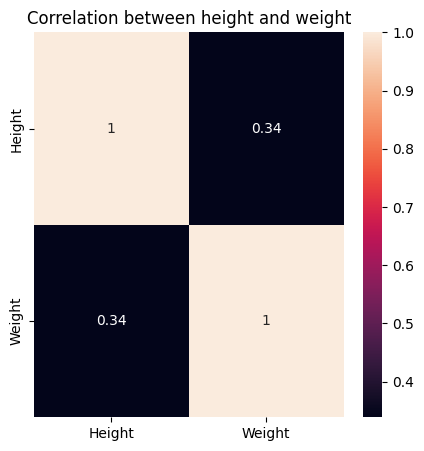

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(),annot=True)
plt.title("Correlation between height and weight")
plt.show()

* As we can see their is moderate positive correlation between height and weight of data

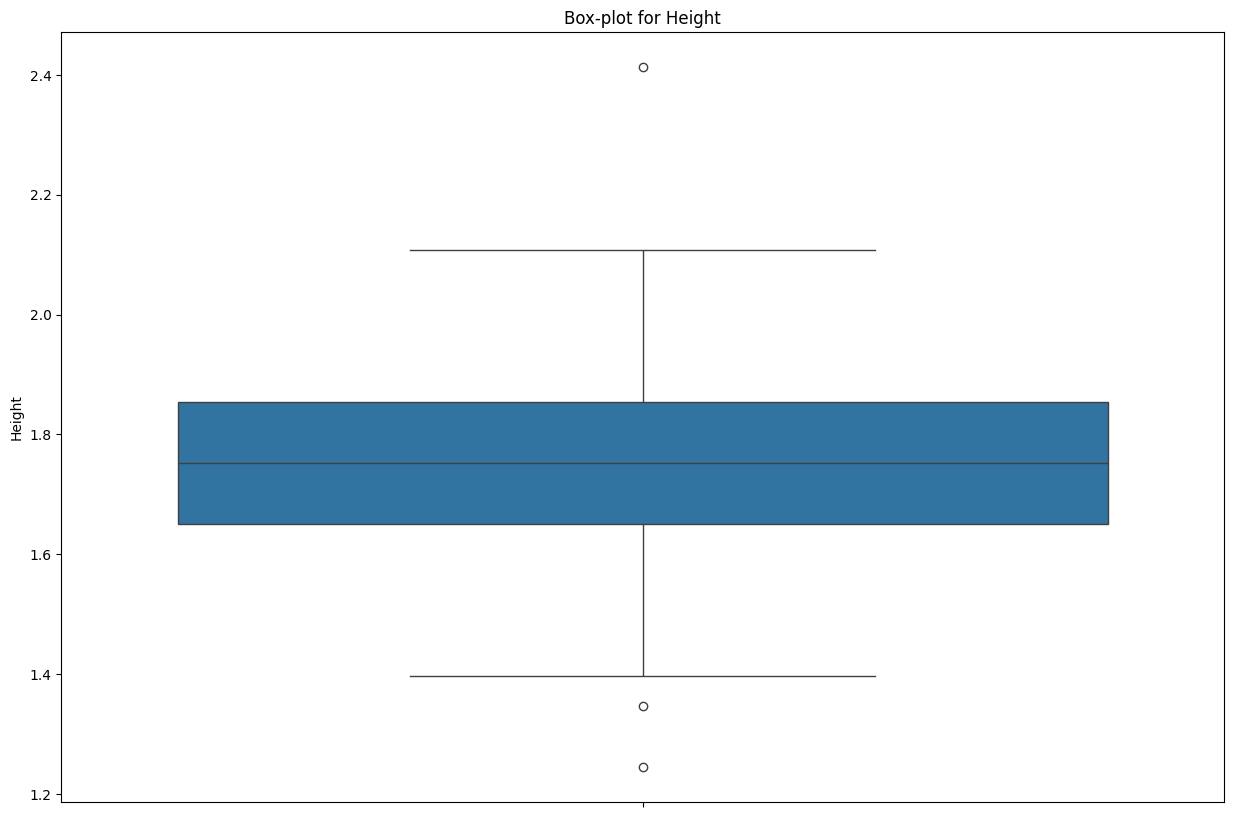

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(df2['Height'])
plt.title("Box-plot for Height")
plt.show()

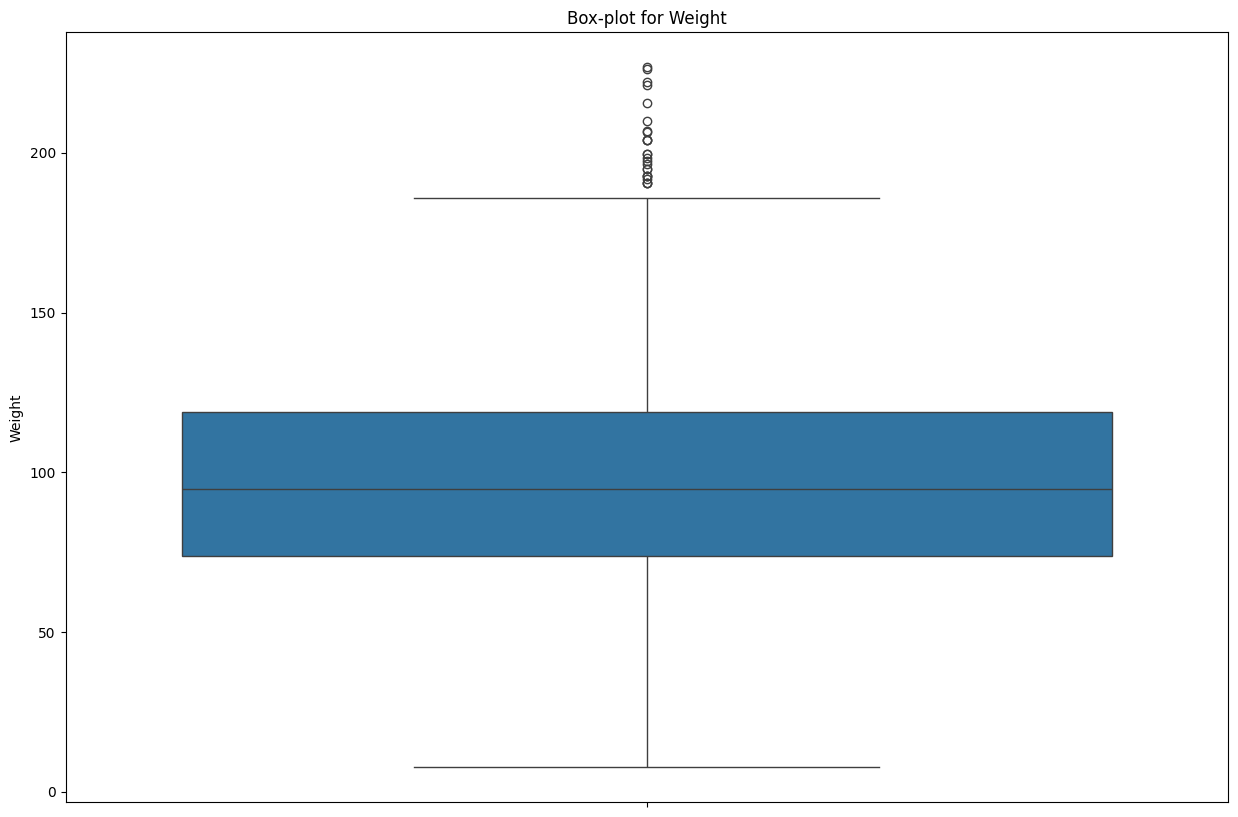

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(df2['Weight'])
plt.title("Box-plot for Weight")
plt.show()

* Comparatively there is more outliers in Weight than Height

In [13]:
def remove_outliers(df):
    Q1 = df['Height'].quantile(0.25)
    Q3 = df['Height'].quantile(0.75)
    IQR = Q3 - Q1
    height_outliers = df2[(df2['Height'] < (Q1 - 1.5 * IQR)) | (df2['Height'] > (Q3 + 1.5 * IQR))]

    Q1 = df2['Weight'].quantile(0.25)
    Q3 = df2['Weight'].quantile(0.75)
    IQR = Q3 - Q1
    weight_outliers = df2[(df2['Weight'] < (Q1 - 1.5 * IQR)) | (df2['Weight'] > (Q3 + 1.5 * IQR))]

    df3 = df2.drop(height_outliers.index).drop(weight_outliers.index)
    return df3

In [14]:
df3 = remove_outliers(df2)

In [15]:
df3

,Height,Weight
0,1.7526,47.627160
1,1.7018,54.431040
2,1.6510,47.627160
3,1.6764,43.998424
4,1.6256,54.431040
...,...,...
3448,1.9558,80.739376
3449,2.0066,85.728888
3450,1.8542,54.431040
3451,2.1082,117.933920


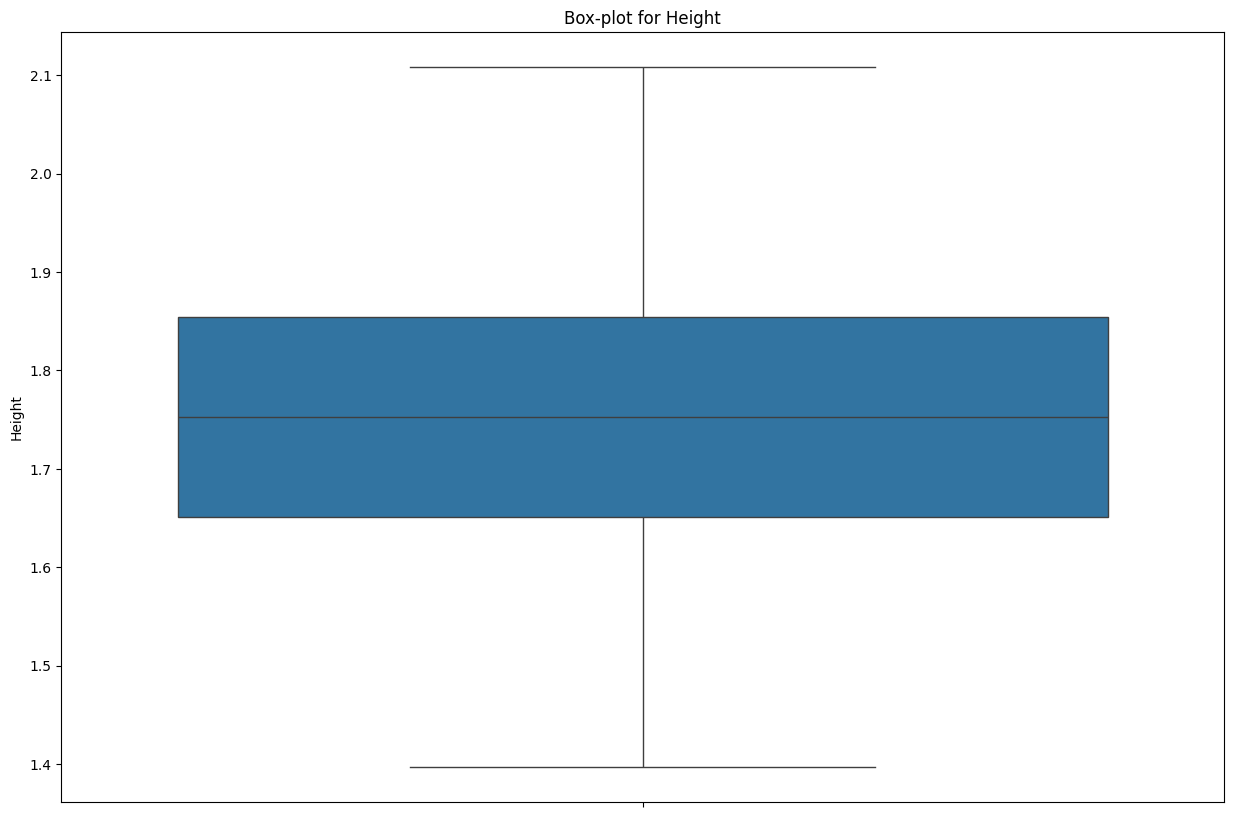

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(df3['Height'])
plt.title("Box-plot for Height")
plt.show()

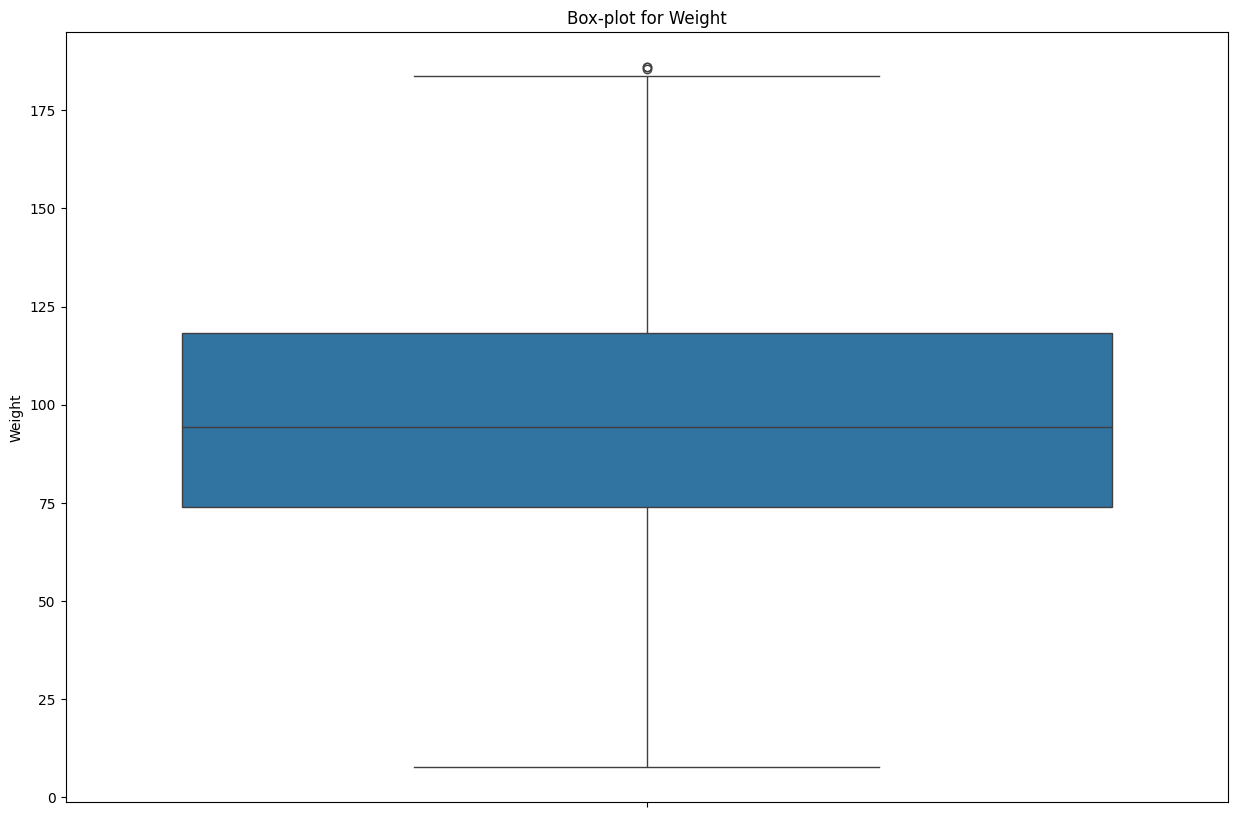

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(df3['Weight'])
plt.title("Box-plot for Weight")
plt.show()

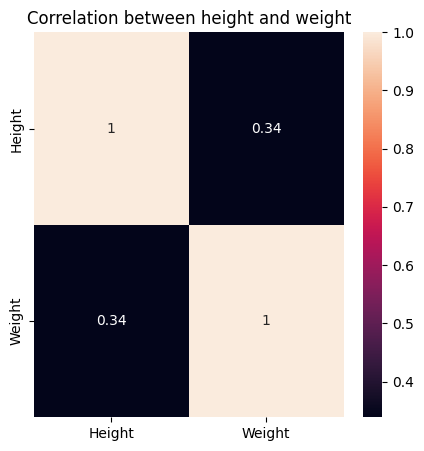

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(df3.corr(),annot=True)
plt.title("Correlation between height and weight")
plt.show()

In [19]:
df3.to_csv("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\artifacts\\H_and_W_data_updated.csv")

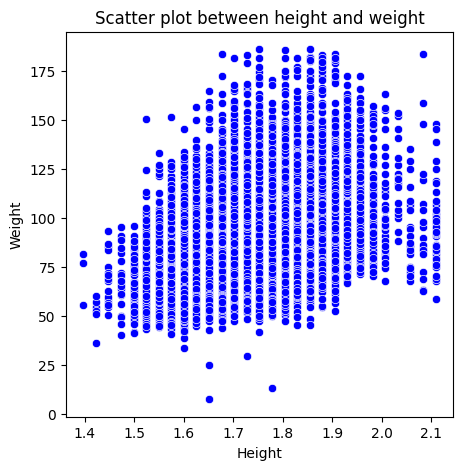

In [20]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df3['Height'],y=df3['Weight'],c='blue')
plt.title("Scatter plot between height and weight")
plt.show()

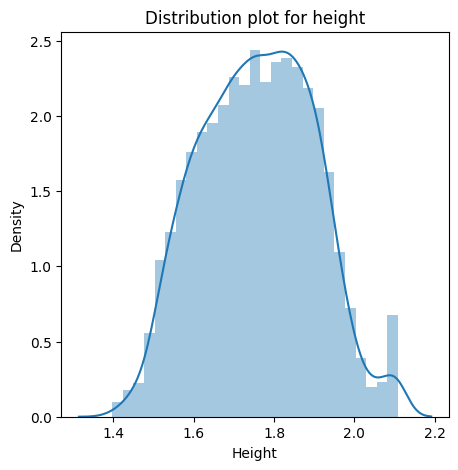

In [21]:
plt.figure(figsize=(5,5))
sns.distplot(df3['Height'])
plt.title("Distribution plot for height")
plt.show()

* In our dataset majority of datapoints has height between 1.6 meters to 2.0 meters 

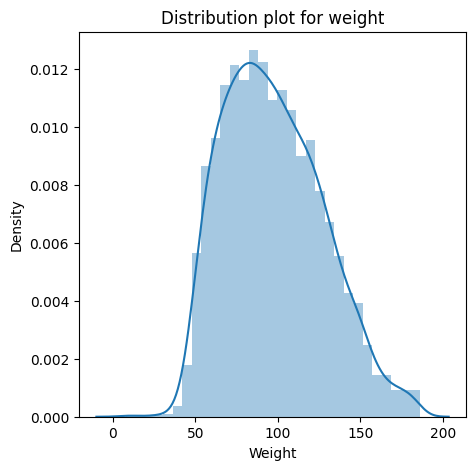

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(df3['Weight'])
plt.title("Distribution plot for weight")
plt.show()

* In our dataset majority of datapoint has weight between 50kg to 170kg

In [23]:
scrpd_data = pd.read_csv("C:\\Users\\HP\\Desktop\\PW_Projects\\Body_Mass_Index_from_Face_Images\\artifacts\\img_name_and_height.csv")

In [25]:
scrpd_data['height'] = [(h*0.01) for h in scrpd_data['height']]

In [26]:
scrpd_data

,image_name,height
0,Bruce-Lee.jpg,1.67
1,Burt-Bacharach.jpg,1.66
2,Lee-Van-Cliff.jpg,1.82
3,Anthony-Quinn.jpg,1.77
4,Graham-Greene.jpg,1.74
...,...,...
985,devid-bekhem-hochet-postroit-akterskuju-kareru...,1.80
986,Arnold-Schrazenegger-boss.jpg,1.80
987,Jean-Claude-Van-Damme-Hollywood-Celebrities-Wa...,1.77
988,PremiereSonyPicturesGhostbustersArrivalsCRDGV9...,1.57


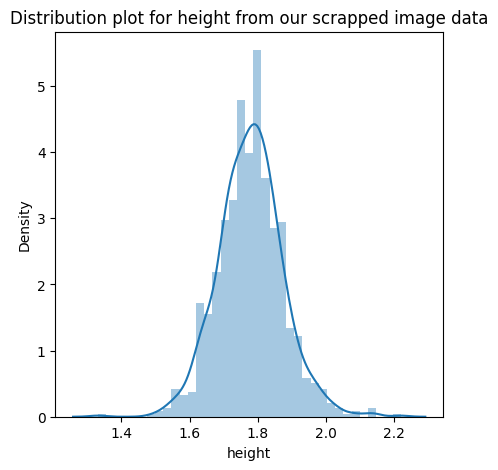

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(scrpd_data['height'])
plt.title("Distribution plot for height from our scrapped image data")
plt.show()

* As we can see the distribution of height from the scrapped image and height data is almost similar as data that we have taken for weight prediction from height.